<a href="https://colab.research.google.com/github/ErnestoCash/ASAP/blob/main/yfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 21.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
import tensorflow as tf
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed


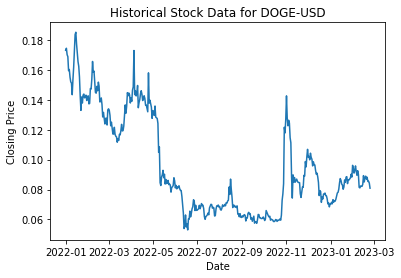

In [ ]:
# Load stock data from Yahoo FinanceCargar data de accion de Yahoo Finance ( Escoger una por una)
ticker = "DOGE-USD"
start_date = "2022-01-01"
end_date = "2023-02-25"
data = yf.download(ticker, start=start_date, end=end_date)
# Plot the data
plt.plot(data.index, data['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Historical Stock Data for {}'.format(ticker))
plt.show()

In [ ]:
# Preprocesamiento de los datos
x = data['Close'][:-1]   # Usar TODOS los datos excepto el primero para entranar al modelo
y = data['Close'][1:]    # Predecir el precio de cierre del siguiente dia
x = np.array(x)
y = np.array(y)
x = np.reshape(x, (len(x), 1))

In [ ]:
# Definir el modelo
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [ ]:
# Compiar el modelo
modelo.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error')


In [ ]:
# ENtrenar el modelo
modelo.fit(x, y, epochs=200)

Epoch 1/200
14/14 [==============================] - 1s 3ms/step - loss: 0.0307
Epoch 2/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 3/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 4/200
14/14 [==============================] - 0s 3ms/step - loss: 9.7709e-04
Epoch 5/200
14/14 [==============================] - 0s 2ms/step - loss: 4.7899e-04
Epoch 6/200
14/14 [==============================] - 0s 2ms/step - loss: 3.5812e-04
Epoch 7/200
14/14 [==============================] - 0s 3ms/step - loss: 1.1789e-04
Epoch 8/200
14/14 [==============================] - 0s 2ms/step - loss: 3.9657e-05
Epoch 9/200
14/14 [==============================] - 0s 2ms/step - loss: 3.1914e-05
Epoch 10/200
14/14 [==============================] - 0s 2ms/step - loss: 3.9359e-05
Epoch 11/200
14/14 [==============================] - 0s 2ms/step - loss: 3.1670e-05
Epoch 12/200
14/14 [==============================] - 0s 3ms/step - loss: 3.7341e-05
E

In [ ]:
# Predecir el precio para el siguiente dia
next_day_price = modelo.predict(np.array([x[-1]]))
print("Predicted next day price:", next_day_price)

1/1 [==============================] - 0s 95ms/step
Predicted next day price: [[0.07760501]]


In [ ]:
# Get the current stock price
ticker_info = yf.Ticker(ticker)
current_price = ticker_info.history(period="1d")['Close'].iloc[-1]
print("Current stock price:", current_price)

Current stock price: 0.08116108179092407
